In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Lode the Dataset
data = pd.read_csv("Quality_of_Life.csv")

# Display First Few Rows
data.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

In [8]:
#Check for duplicates

data.nunique()

country                              236
Purchasing Power Value               189
Purchasing Power Category              5
Safety Value                         231
Safety Category                        5
Health Care Value                    204
Health Care Category                   5
Climate Value                        115
Climate Category                       4
Cost of Living Value                 190
Cost of Living Category                5
Property Price to Income Value       204
Property Price to Income Category      5
Traffic Commute Time Value           184
Traffic Commute Time Category          5
Pollution Value                      222
Pollution Category                     5
Quality of Life Value                113
Quality of Life Category               5
dtype: int64

In [9]:
#Summary Statistics of numrical columns 
data.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,28.492966,54.266186
std,52.008245,16.914298,20.607381,40.851542,26.026565,17.347242,25.853695
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,17.100000,35.700000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,29.845000,59.765000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,38.870000,73.740000
max,281.830000,100.000000,100.000000,99.890000,137.370000,100.000000,106.900000


In [10]:
# checking for nulls and treating them.

data.isnull().sum()

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64

In [11]:
data.isnull().sum()/len(data)*100

country                               0.000000
Purchasing Power Value                0.000000
Purchasing Power Category            19.491525
Safety Value                          0.000000
Safety Category                       0.847458
Health Care Value                     0.000000
Health Care Category                  6.355932
Climate Value                         0.000000
Climate Category                     51.694915
Cost of Living Value                  0.000000
Cost of Living Category              19.067797
Property Price to Income Value        0.000000
Property Price to Income Category     8.898305
Traffic Commute Time Value            0.000000
Traffic Commute Time Category        12.288136
Pollution Value                       0.000000
Pollution Category                    4.237288
Quality of Life Value                 0.000000
Quality of Life Category             51.694915
dtype: float64

# Data Reductionc

In [13]:
# Clean and convert 'Property Price to Income Value' to numeric
data['Property Price to Income Value'] = pd.to_numeric(data['Property Price to Income Value'], errors='coerce')

In [14]:
# Clean and convert 'Quality of Life Value' to numeric, removing any non-numeric characters
data['Quality of Life Value'] = data['Quality of Life Value'].replace({r'[^\d.]': ''}, regex=True).replace('', np.nan).astype(float)

In [15]:
# Replace 'None' and similar placeholders with NaN in all object columns
data.replace(['None', "'None'", "'none'", 'none'], np.nan, inplace=True)


In [16]:
# For categorical columns, fill missing values with the mode (most frequent value)
categorical_columns = ['Purchasing Power Category', 'Safety Category', 'Health Care Category', 
                       'Climate Category', 'Cost of Living Category', 
                       'Property Price to Income Category', 'Traffic Commute Time Category', 
                       'Pollution Category', 'Quality of Life Category']

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [17]:
descriptive_stats = data.describe()

In [18]:
descriptive_stats

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Property Price to Income Value,Traffic Commute Time Value,Pollution Value,Quality of Life Value
count,236.000000,236.000000,236.000000,236.000000,236.000000,233.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,22.297210,28.492966,54.266186,63.466780
std,52.008245,16.914298,20.607381,40.851542,26.026565,52.251007,17.347242,25.853695,73.307577
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,6.390000,17.100000,35.700000,0.000000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,11.610000,29.845000,59.765000,0.000000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,17.490000,38.870000,73.740000,127.135000
max,281.830000,100.000000,100.000000,99.890000,137.370000,450.400000,100.000000,106.900000,224.310000


In [19]:
numerical_cols = ['Purchasing Power Value', 'Safety Value', 'Health Care Value', 
                  'Climate Value', 'Cost of Living Value', 
                  'Property Price to Income Value', 'Traffic Commute Time Value', 
                  'Pollution Value', 'Quality of Life Value']

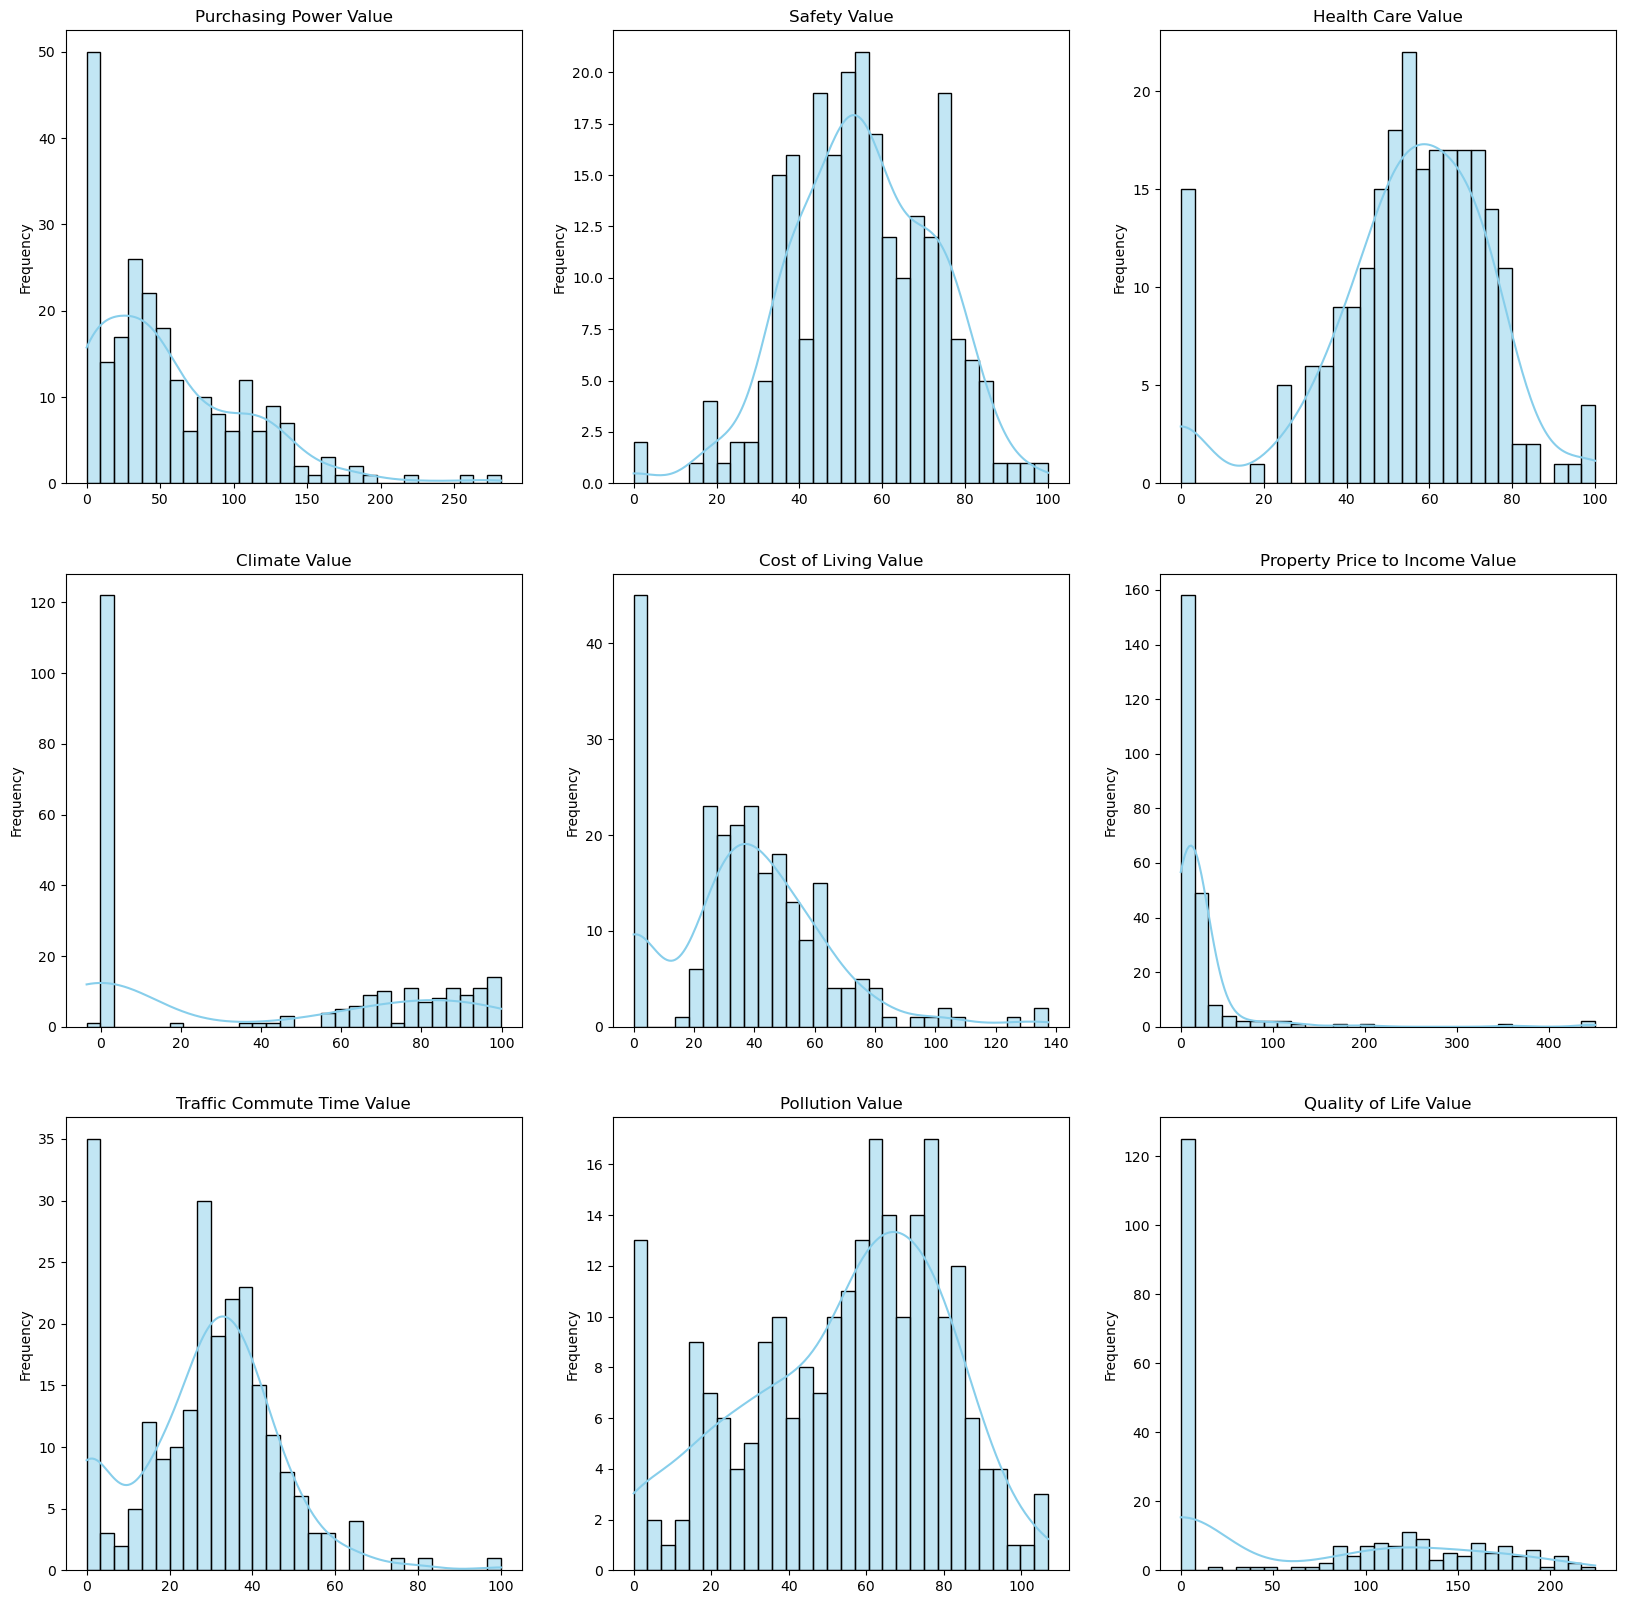

In [20]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.show()

# Correlation Analysis

In [22]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

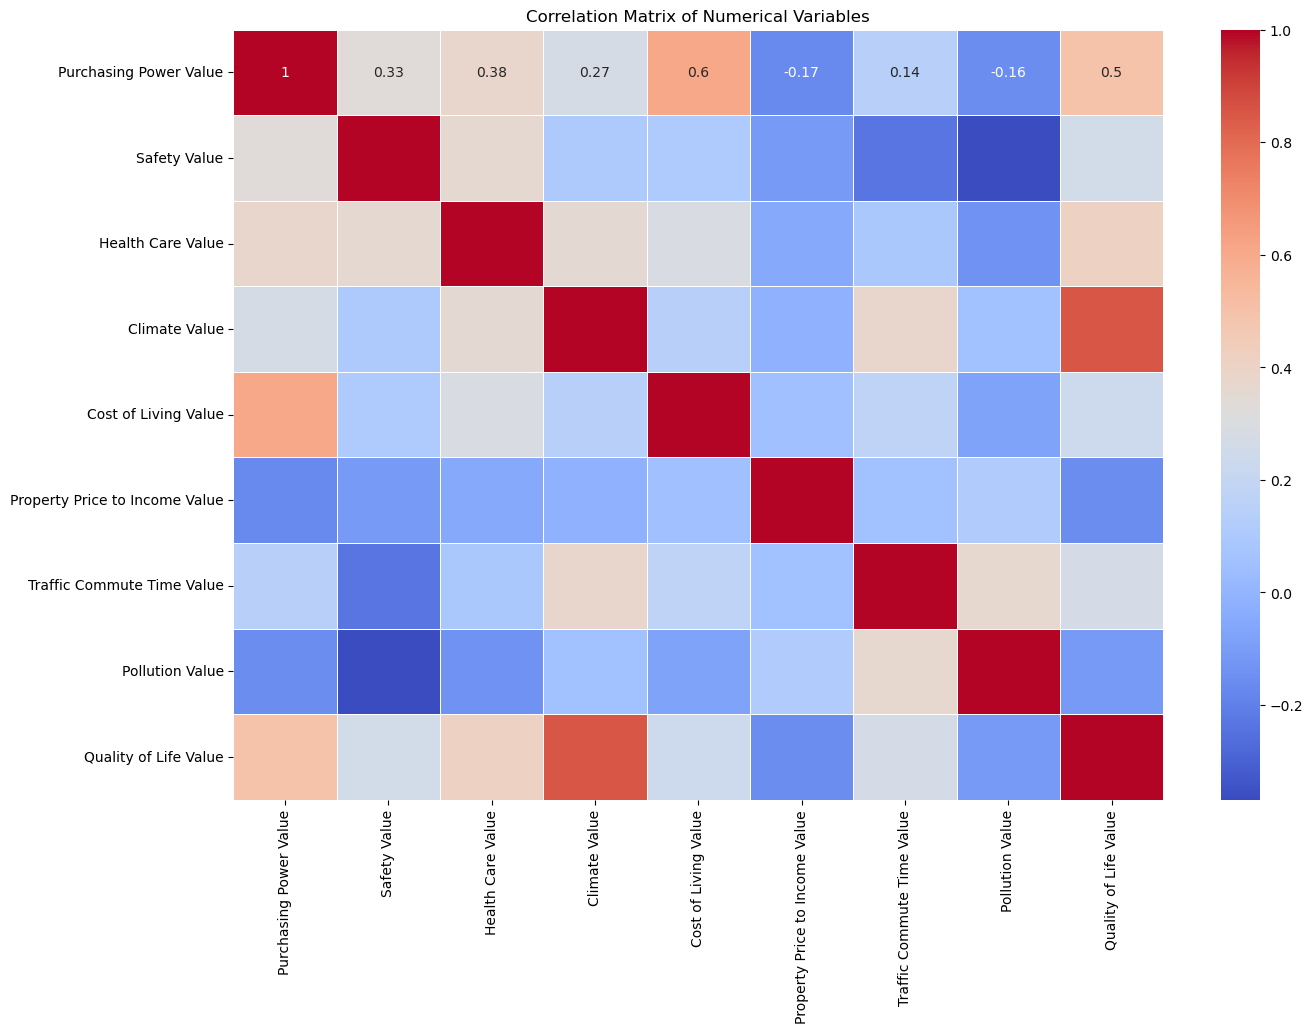

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

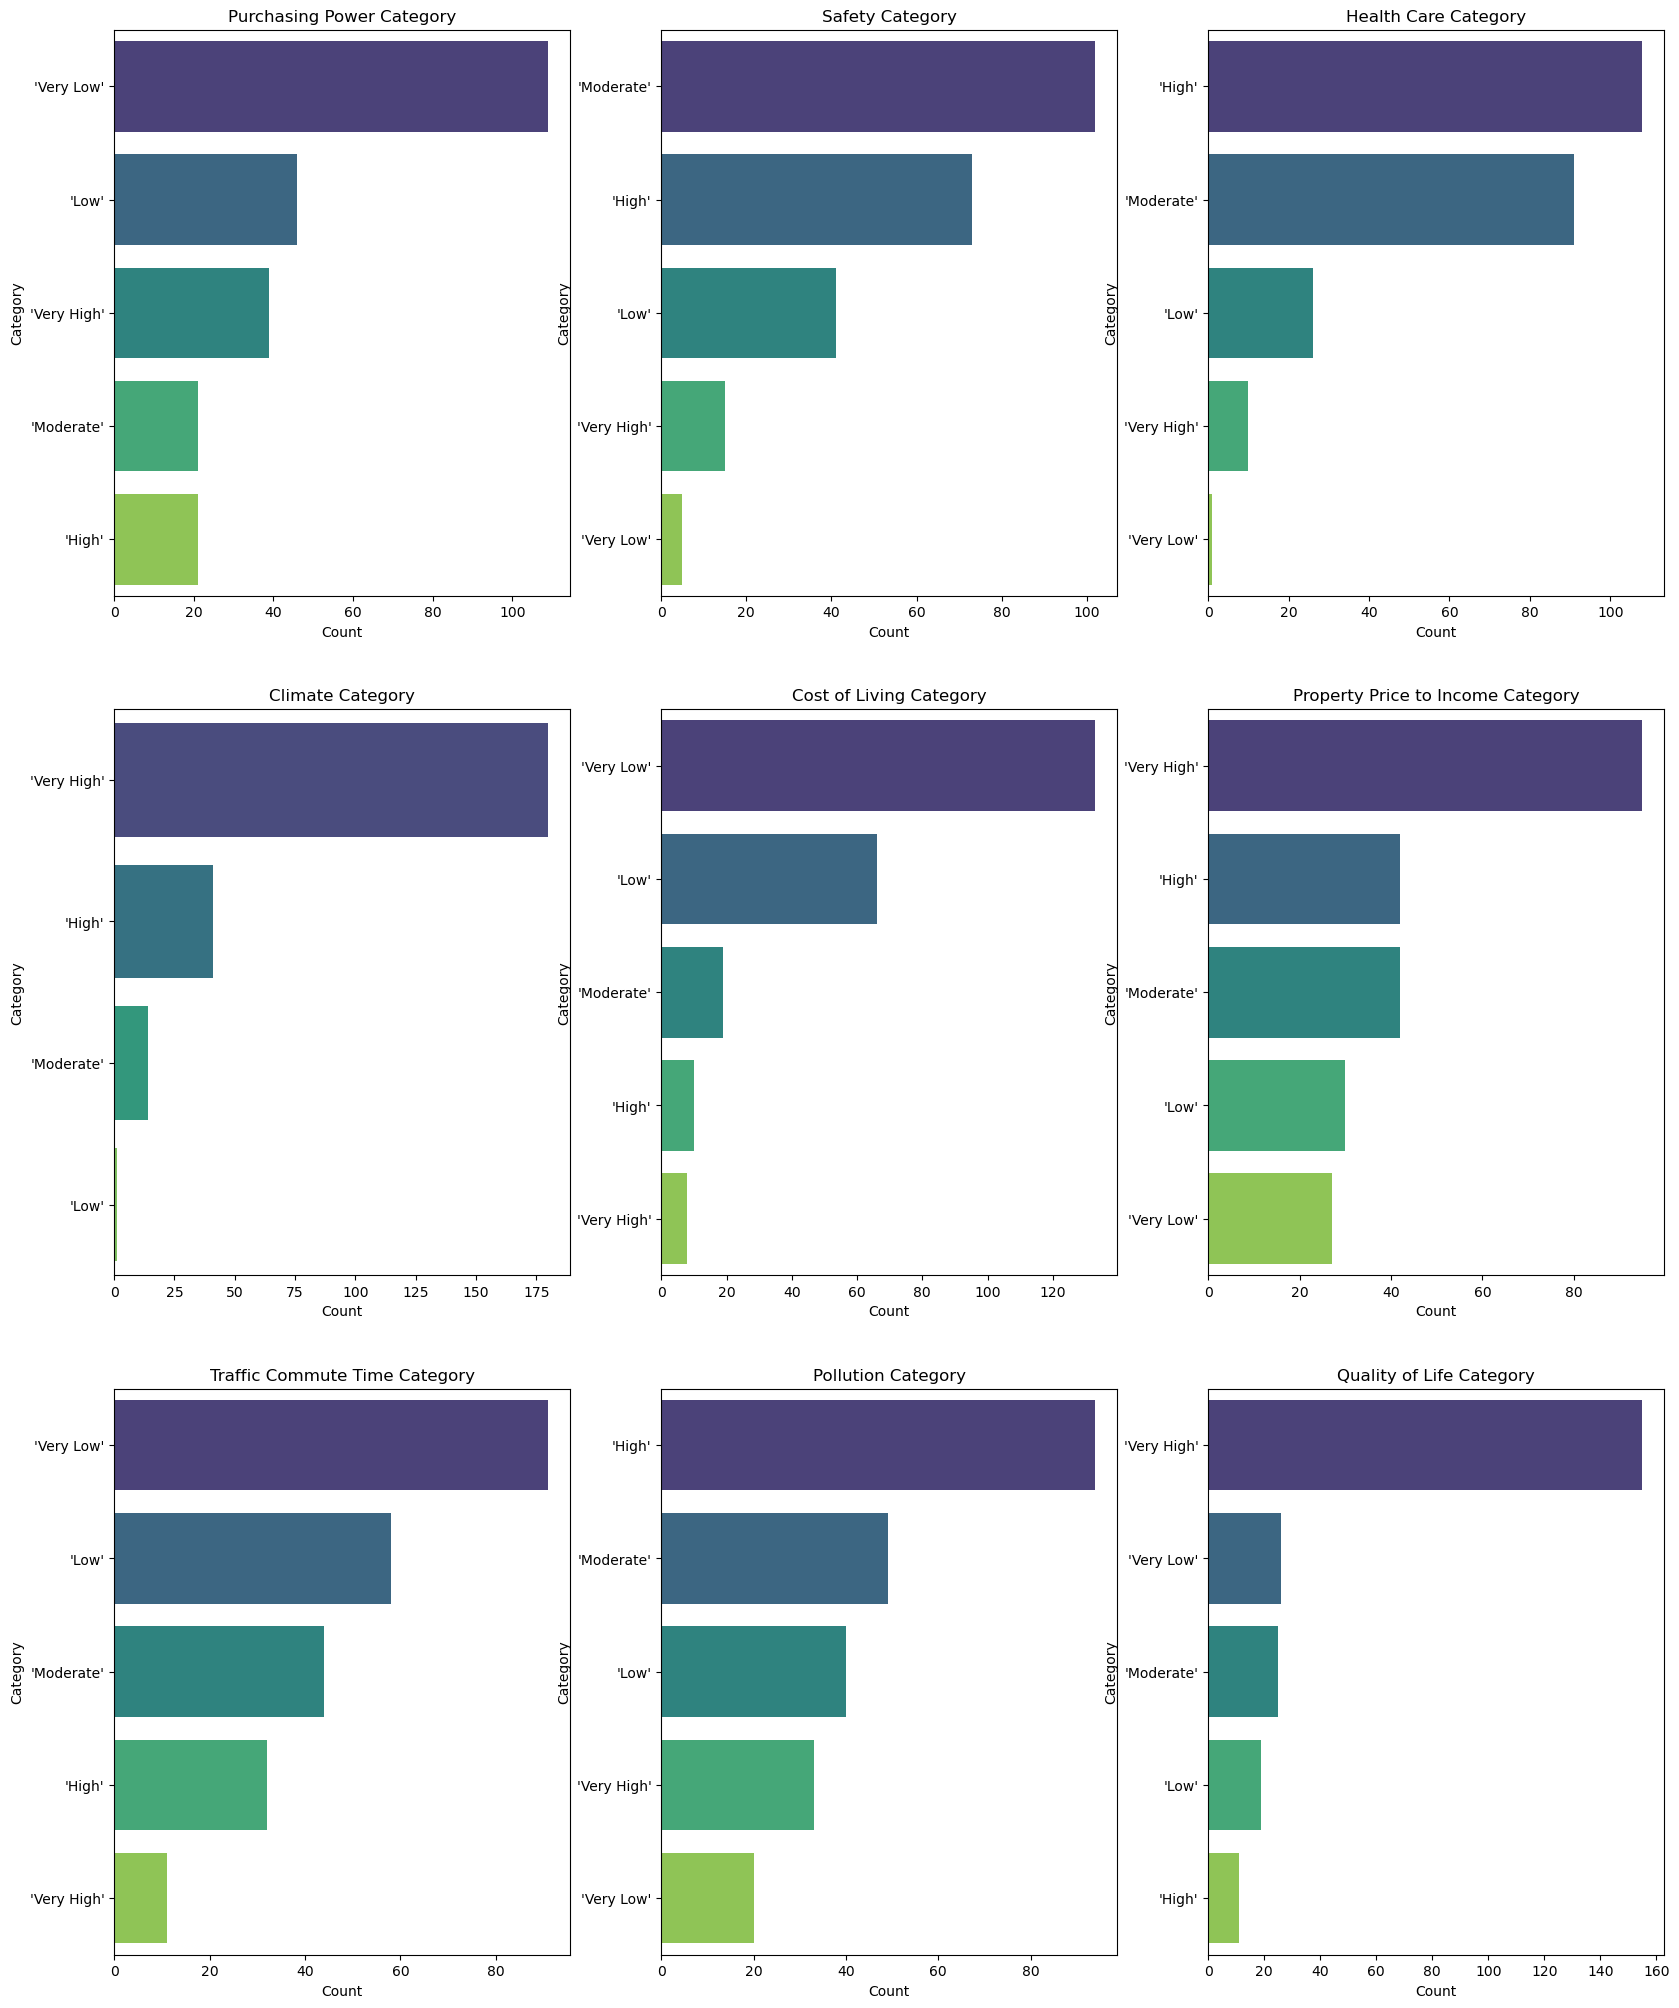

In [24]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=data[col], palette='viridis', order=data[col].value_counts().index)
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('Category')
plt.show()

In [52]:
data

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,'Very High',21.08,'Very Low',7.80,'Low',56.17,'Very High',84.44,'Very High',0.00,'Very High'
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,'Very High',53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.00,'Very High'
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',104.16,'Low'
3,Alderney,0.00,'Very Low',83.79,'Very High',100.00,'Very High',0.00,'Very High',0.00,'Very Low',0.00,'Very High',5.00,'Very Low',1.72,'Very Low',0.00,'Very High'
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.70,'Very High',45.09,'High',63.87,'High',98.83,'Very Low'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Wallis And Futuna,0.00,'Very Low',0.00,'Moderate',0.00,'High',0.00,'Very High',0.00,'Very Low',0.00,'Very High',0.00,'Very Low',0.00,'High',0.00,'Very High'
232,Western Sahara,0.00,'Very Low',62.87,'High',0.00,'High',0.00,'Very High',0.00,'Very Low',12.75,'High',0.00,'Very Low',0.00,'High',0.00,'Very High'
233,Yemen,20.74,'Very Low',34.07,'Low',25.31,'Low',0.00,'Very High',48.66,'Low',15.98,'High',15.00,'Very Low',83.17,'Very High',0.00,'Very High'
234,Zambia,22.32,'Very Low',54.39,'Moderate',54.44,'Moderate',0.00,'Very High',36.74,'Very Low',72.42,'Very High',38.86,'Moderate',80.90,'Very High',0.00,'Very High'
